In [1]:
from matplotlib import font_manager, rc  # 한글사용 matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import csv
import codecs
import datetime 
import numpy as np
import json
import tensorflow as tf
import jpype
from konlpy.tag import Okt
from IPython.core.interactiveshell import InteractiveShell
from pandas import DataFrame as df
InteractiveShell.ast_node_interactivity = 'all'
os.chdir("C:/Users/windd/pythondata")
%matplotlib inline
font_name = font_manager.FontProperties(
    fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [446]:
# 기존 마스터 데이터

data = pd.read_excel('수료/master_data_real.xlsx')

# 과거성공프로젝트수 수정 마스터 데이터

data_new = pd.read_excel('수료/master_data22.xlsx')

# 펀딩시작요일 원핫인코딩

data = pd.concat([data,pd.get_dummies(data['펀딩시작요일'])],axis=1)
data_new = pd.concat([data_new,pd.get_dummies(data_new['펀딩시작요일'])],axis=1)

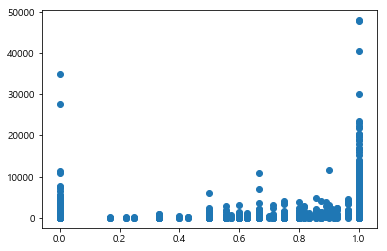

In [447]:
# 이렇게 하는게 더 값이 잘나와서 그냥 이렇게 하자
# 다른 방법있으면 적용해봐도 될듯

data['과거프로젝트수'] = data.과거프로젝트수 + 1
data = data[(data.과거성공프로젝트수/data.과거프로젝트수)<=1]

plt.scatter(data.과거성공프로젝트수/data.과거프로젝트수, data.달성률)
data['성공비율'] = data.과거성공프로젝트수/data.과거프로젝트수

In [448]:
data.columns

Index(['Unnamed: 0', 'url', '메이커', '펀딩시작날짜', '펀딩마감날짜', '펀딩시작요일', '목표금액',
       '서포터수', '좋아요수', '글업데이트수', '댓글수', '리워드종류수', '이미지수', '비디오수', '배송시작날짜',
       '마감배송차이', '인스타존재여부', '인스타팔로워수', '와디즈팔로워수', '과거프로젝트수', '과거성공프로젝트수',
       '앵콜펀딩여부', '음절수', '단어수', '문장수', 'Strong', 'Under', '가독성', '가독성2',
       '제목단어수', '펀딩성공여부', '달성률', '펀딩시작월', '소비자물가', '근원물가', '생활물가', '실질GDP성장률',
       '제목', '달성액', '요약글', '카테고리', '디자인소품', '반려동물', '뷰티', '스포츠·모빌리티', '여행·레저',
       '테크·가전', '패션·잡화', '푸드', '홈리빙', '분기', '와디즈기사개수', '크라우드펀딩기사개수', 'PER',
       'PBR', 'ROE', 'EBIT', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       '성공비율'],
      dtype='object')

In [449]:
# 필요한 컬럼만 추출

total = data2[[ '목표금액', '글업데이트수', '리워드종류수', '펀딩시작날짜','펀딩마감날짜',
              '이미지수', '비디오수', '마감배송차이', '가독성','가독성2', 'Strong','Under', '성공비율',
              '와디즈팔로워수', '과거프로젝트수', '과거성공프로젝트수', '앵콜펀딩여부', '문장수','단어수','음절수','가독성비율','음절_단어',
              '제목단어수', '디자인소품', '반려동물', '뷰티', '스포츠·모빌리티', '여행·레저',
              '테크·가전', '패션·잡화', '푸드', '홈리빙', '달성률']]

# 펀딩기간 형성 및 정수로 변환

total['펀딩기간'] = (total['펀딩마감날짜'] - total['펀딩시작날짜'])
total['펀딩기간'] = total.펀딩기간.dt.days

# 사용한 날짜 변수 다시 제거

total = total.drop(columns = ['펀딩시작날짜','펀딩마감날짜'])

# 펀딩기간 0인거 제거

total = total[total['펀딩기간']!=0]

# 일단 하면 성능좋아져서 했음


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [450]:
# 일펀딩금액과 일글수 파생변수 생성

total['일펀딩금액'] = total.목표금액/total.펀딩기간
total['일글수'] = total.글업데이트수/total.펀딩기간

In [451]:
# 일평균 글업데이트수와 중복되는 컬럼이기 때문에 제거 or 지켜보자

total = total.drop(columns = ['글업데이트수','과거성공프로젝트수','목표금액'])

In [452]:
# 파생변수

total['문장당강조'] = total.Strong/total.문장수
total['문장당밑줄']= total.Under/total.문장수

In [453]:
# 달성률을 너무 계속 자르면 좋진 않을거 같고 3만정도 자르면 일단
# 70 -> 72%로 정확도 향상됐음

total = total[total['달성률']<30000]

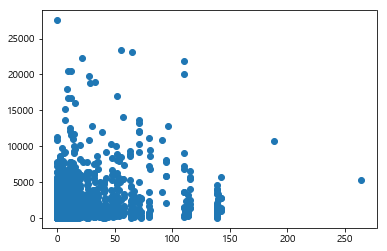

In [355]:
plt.scatter(total.와디즈팔로워수,total.달성률)

In [454]:
total.index = list(range(len(total)))

In [455]:
# 달성률 범주생성
# 현재 범주는 임의의 범주이며
# 여러가지 시도하면서 정확도를 봐야할듯

total_target = total

target_list = []

for i in range(len(total_target)):
    if total_target.달성률[i] < 100:
        target_list.append(0)
    elif total_target.달성률[i] < 700:
        target_list.append(1)
    elif total_target.달성률[i] < 2000:
        target_list.append(2)
    elif total_target.달성률[i] < 10000:
        target_list.append(3)
    else:
        target_list.append(4)
    
total_target['타겟'] = target_list
total_target.pivot_table(index = '타겟', aggfunc = 'count', values = '달성률')
total_data = total_target.drop(columns = ['달성률'])

,달성률
타겟,
0,1132
1,2659
2,1027
3,642
4,45


In [456]:
X = total_data.drop(columns=['타겟'])
y = total_data.타겟

# 학습용/테스트용 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000)

rf.fit(X_train, y_train)

rf.score(X_train, y_train)
rf.score(X_test, y_test)

y_pred = rf.predict(X_test)

import sklearn.metrics as mt

mt.accuracy_score( y_pred, y_test)
mt.confusion_matrix(y_pred, y_test)

pd.DataFrame({'속성명':total_data.columns[:-1], '중요도':rf.feature_importances_}).sort_values('중요도',ascending=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

1.0

0.7100484261501211

0.7100484261501211

array([[307,  24,   3,   0,   0],
       [ 35, 712, 227,  80,   2],
       [  0,  27,  80,  37,   1],
       [  0,   5,  29,  73,   9],
       [  0,   0,   0,   0,   1]], dtype=int64)

,속성명,중요도
29,일글수,0.152448
8,성공비율,0.140623
9,와디즈팔로워수,0.062004
28,일펀딩금액,0.050750
1,이미지수,0.043526
14,음절수,0.035151
13,단어수,0.034399
3,마감배송차이,0.033958
15,가독성비율,0.033863
12,문장수,0.033785


In [457]:
import xgboost
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

xgb_clf.score(X_test, y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

0.7058111380145279

In [458]:
# gridsearch

from sklearn.model_selection import GridSearchCV

xgb_params = {'n_estimators':[100,200],
             'learning_rate':[0.1,0.2]}

grid_xgb = GridSearchCV(xgb_clf, param_grid = xgb_params,
               cv= 5, n_jobs=-1)
grid_xgb.fit(X_train, y_train)

grid_xgb.score(X_test,y_test)
grid_xgb.best_params_

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='multi:softprob',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'n_estimators': [100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train

0.711864406779661

{'learning_rate': 0.2, 'n_estimators': 100}